# Reranker / Reorder
- 검색 결과가 10건 정도는 되어야 의미가 있음
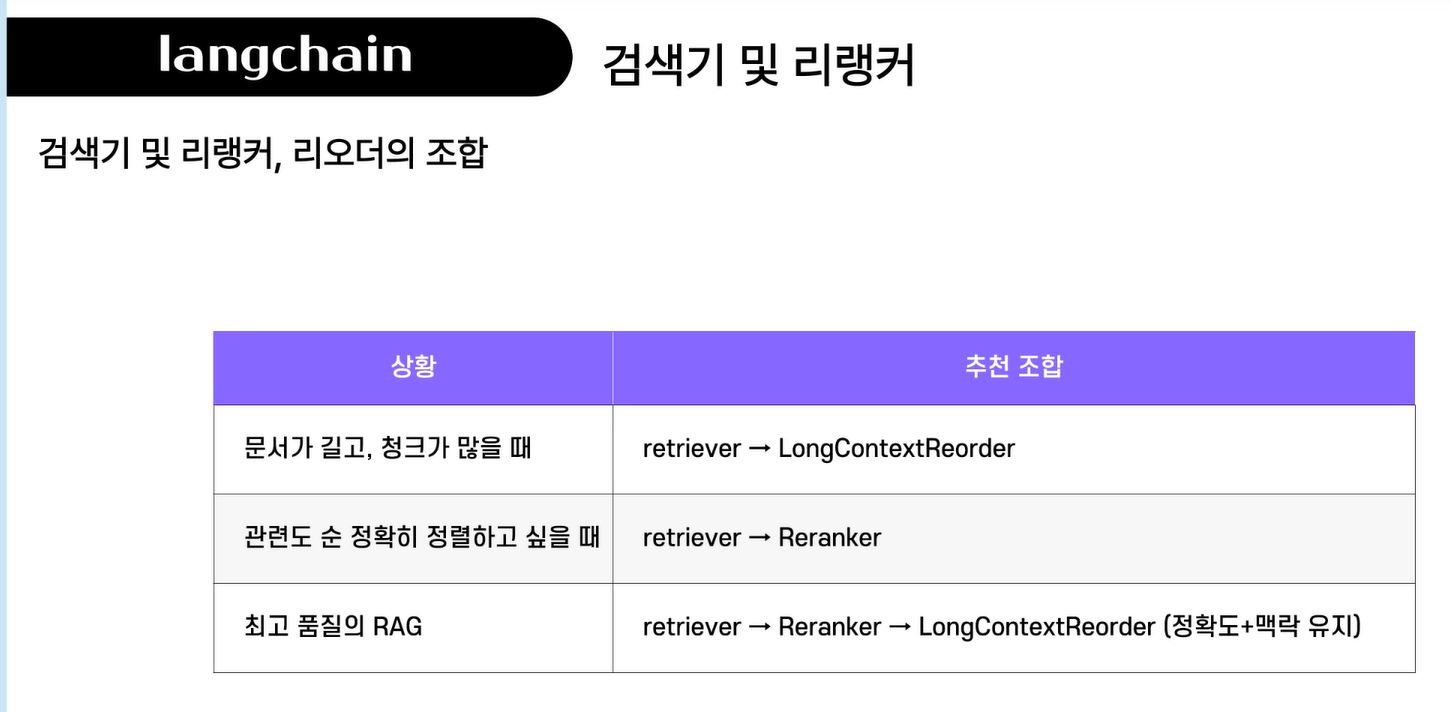

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# 출력 포메팅
from rich.console import Console
from rich.table import Table

console = Console()

def rich_docs(docs, max_len=140, title="Retriever Results"):
    table = Table(title=title)
    table.add_column("#", justify="right")
    table.add_column("Source")
    table.add_column("Page", justify="right")
    table.add_column("Preview")

    for i, d in enumerate(docs, 1):
        m = d.metadata or {}
        src = (m.get("source","") or "").split("/")[-1]
        page = str(m.get("page_label", m.get("page",0)+1))
        text = (d.page_content or "").strip().replace("\n", " ")
        table.add_row(str(i), src, page, (text[:max_len] + ("…" if len(text) > max_len else "")))

    console.print(table)

## 1. db 생성 및 로드

In [3]:
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_chroma import Chroma

embedding = OpenAIEmbeddings(model='text-embedding-3-small')
persist_directory = '../vectorstore/samsung_2025_re'
collection_name = 'samsung_2025'

c:\walker\code\langchain-basic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from langchain_community.document_loaders import PyPDFLoader

docs = PyPDFLoader("../data/Samsung_Electronics_Sustainability_Report_2025_KOR.pdf").load()
len(docs)

87

In [5]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 100
)

chunks = splitter.split_documents(docs)
len(chunks)

237

In [6]:
vectorstore = Chroma.from_documents(
    documents=chunks,
    collection_name=collection_name,
    persist_directory=persist_directory,
    embedding=embedding
)

vectorstore

In [7]:
load_vectorstore = Chroma(
    persist_directory=persist_directory,
    embedding_function=embedding,
    collection_name=collection_name
)

load_vectorstore

## 2. Retriever

In [ ]:
# Dense Retriever
sim_retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={
        "k": 20
    }
)

question = '삼성전자의 2025년 전망은?'

In [10]:
result = sim_retriever.invoke(question)
rich_docs(result)

                                                 Retriever Results                                                 
┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  # ┃ Source                                           ┃ Page ┃ Preview                                          ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  1 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  2 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  3 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  4 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  5 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  6 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  7 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  8 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  9 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts 

## 3. Rerank

In [14]:
from langchain_community.cross_encoders.huggingface import HuggingFaceCrossEncoder
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain.retrievers import ContextualCompressionRetriever

In [12]:
hf_ce = HuggingFaceCrossEncoder(
    model_name = 'cross-encoder/ms-marco-MiniLM-L6-v2',
    model_kwargs = {
        'device' : 'cuda',
        'max_length' : 512
    }
)

c:\walker\code\langchain-basic\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\user\.cache\huggingface\hub\models--cross-encoder--ms-marco-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to 

In [19]:
compressor = CrossEncoderReranker(
    model = hf_ce,
    top_n = 10
)

rerank_retriever = ContextualCompressionRetriever(
    base_retriever=sim_retriever,
    base_compressor=compressor
    
)

rerank_result = rerank_retriever.invoke(question)
rich_docs(rerank_result, title='rerank result')

                                                   rerank result                                                   
┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  # ┃ Source                                           ┃ Page ┃ Preview                                          ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  1 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  2 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  3 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  4 │ Samsung_Electronics_Sustainability_Report_2025_… │   86 │ 삼성전자 지속가능경영보고서 2025 86              │
│    │                                                  │      │ 삼성전자주식회사는 경제·사회·환경적 가치 창출    │
│    │                                                  │      │ 성과를 다양한 이해관계자와 투명하게 소통하기     │
│    │                                                  │      │ 위해 2025년 열여덟 번째 지속가능경영보고서를     │
│    │                                                  │      │ 발간합니다. 작성 기준 본 보고서는 지속가능경영   │
│    │                                                  │      │ 보고 기준인 GRI(G…                               │
│  5 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  6 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  7 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  8 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  9 │ Samsung_Electronics_Sustai

## 4. Reorder

In [18]:
from langchain_community.document_transformers import LongContextReorder

reorder  = LongContextReorder()
reordered_result = reorder.transform_documents(rerank_result)

rich_docs(reordered_result, title='reorder result')

                                                  reorder result                                                   
┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃  # ┃ Source                                           ┃ Page ┃ Preview                                          ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  1 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │                                                  │      │ …                                                │
│  2 │ Samsung_Electronics_Sustainability_Report_2025_… │   86 │ 삼성전자 지속가능경영보고서 2025 86              │
│    │                                                  │      │ 삼성전자주식회사는 경제·사회·환경적 가치 창출    │
│    │                                                  │      │ 성과를 다양한 이해관계자와 투명하게 소통하기     │
│    │                                                  │      │ 위해 2025년 열여덟 번째 지속가능경영보고서를     │
│    │                                                  │      │ 발간합니다. 작성 기준 본 보고서는 지속가능경영   │
│    │                                                  │      │ 보고 기준인 GRI(G…                               │
│  3 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  4 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  5 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  6 │ Samsung_Electronics_Sustainability_Report_2025_… │    1 │ 삼성전자 지속가능경영보고서 2025 A Journey       │
│    │                                                  │      │ Towards   a Sustainable Future A Journey         │
│    │                                                  │      │ Towards  a Sustainable Future                    │
│  7 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  8 │ Samsung_Electronics_Sustainability_Report_2025_… │   77 │ 삼성전자 지속가능경영보고서 2025 77 Scope 1, 2   │
│    │                                                  │      │ 온실가스 배출량 검증 의견서 Our Company          │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│  9 │ Samsung_Electronics_Sustainability_Report_2025_… │    4 │ 삼성전자 지속가능경영보고서 2025 04 Our Company  │
│    │                                                  │      │ AppendixFacts & Figures PrinciplePlanet People   │
│    │                                                  │      │ 주주, 고객, 협력회사, 그리고 임직원 여러분,      │
│    │                                                  │      │ 2024년은 글로벌 지정학적 리스크와 AI 기술의 성 … │
│    │      